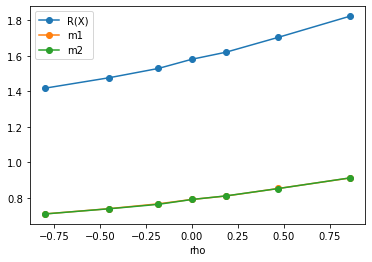

In [1]:
import sys
sys.path.append('../../..')
from Library.lossSRM import LossAbs
from Library.CompoundPoisson2 import CompoundPoisson2
import numpy as np
import scipy.stats as st
from scipy.optimize import minimize

In [2]:
class MCLossFunction(LossAbs):
    def __init__(self, X, alpha, c = None):
        self.__alpha = alpha
        super(MCLossFunction, self).__init__(X, c)
        
    def shortfall_risk(self, m = None):
        m = self._check_argument(m)
        #This substract from the col i of X, m_i
        #X is a matrix of dim columns and N rows where N is the sample's length
        x_minus_m = np.subtract(self.X, m)
        #axis = 1 means we sum the elements of each row
        mean_sum = np.mean(np.sum(x_minus_m, axis = 1))
        pos_part = np.maximum(x_minus_m, 0)
        mean_sum_2 = np.mean(np.sum(pos_part ** 2, axis = 1))
        cross_term = 0.
        for i in range(self.dim):
            for j in range(i + 1, self.dim):
                cross_term += np.mean(np.multiply(pos_part[:, i], pos_part[:, j]))
        return mean_sum + 0.5 * mean_sum_2 + self.__alpha * cross_term
    
    def shortfall_risk_jac(self, m):
        m = self._check_argument(m)
        x_minus_m = np.subtract(self.X, m)
        pos_part = np.maximum(x_minus_m, 0) 
        pos_part_mean = np.mean(pos_part, axis = 0)
        cross_jac = []
        for i in range(self.dim):
            temp = 0.
            indic_i = np.sign(pos_part[:, i])
            for k in range(self.dim):
                if k != i:
                    temp += self.__alpha * np.mean(np.multiply(pos_part[:, k], indic_i))
            cross_jac.append(temp)
        return pos_part_mean + 1. + cross_jac

In [4]:
#Case: rho = -0.9, alpha = 1

#M is the length of the sample

#Modifier distr en utilisant le getter!!!!!!!!!
M = 1000000
rho_gauss = [[1, -0.9],[-0.9, 1]]
lam = [2, 2]
T = 1
lam_exp = [3, 3]
obj = CompoundPoisson2(T, lam,  M, lam_exp, rho_gauss)
distr = obj.get_compound_distr()
rho_pois = obj.rho_pois()

c = 1.
alpha  = 1.
loss = MCLossFunction(distr, alpha, c)
maxiter = 3500

init = np.ones(loss.dim)
cons = ({'type': 'ineq',
         'fun' : lambda x: loss.ineq_constraint(x),
         'jac' : lambda x: loss.ineq_constraint_jac(x)})
%timeit res = minimize(loss.objective, init, jac = loss.objective_jac, constraints = cons, method='SLSQP',options={'maxiter': maxiter, 'disp': True})

print(rho_pois)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8457855986439711
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8457855986439711
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8457855986439711
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8457855986439711
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8457855986439711
            Iterations: 5
            Function evaluations: 6
 

In [5]:
#Case: rho = -0.5, alpha = 1

#M is the length of the sample
M = 1000000
rho_gauss = [[1, -0.5],[-0.5, 1]]
lam = [2, 2]
T = 1
lam_exp = [3, 3]
obj = CompoundPoisson2(T, lam,  M, lam_exp, rho_gauss)
rho_pois = obj.rho_pois()
distr = obj.get_compound_distr()

c = 1.
alpha  = 1.
loss = MCLossFunction(distr, alpha, c)
maxiter = 3500

init = np.ones(loss.dim)
cons = ({'type': 'ineq',
         'fun' : lambda x: loss.ineq_constraint(x),
         'jac' : lambda x: loss.ineq_constraint_jac(x)})
res = minimize(loss.objective, init, jac = loss.objective_jac, constraints = cons, method='SLSQP',options={'maxiter': maxiter, 'disp': True})
print(res)
print(rho_pois)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8687881101062366
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
     fun: 0.8687881101062366
     jac: array([1., 1.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.43403885, 0.43474926])
[[ 1.         -0.45001621]
 [-0.45001621  1.        ]]


In [5]:
#Case: rho = 0, alpha = 1

#M is the length of the sample
M = 1000000
rho_gauss = [[1, 0],[0, 1]]
lam = [2, 2]
T = 1
lam_exp = [3, 3]
obj = CompoundPoisson2(T, lam,  M, lam_exp, rho_gauss)
rho_pois = obj.rho_pois()
distr = obj.compound_poisson2()

c = 1.
alpha  = 1.
loss = MCLossFunction(distr, alpha, c)
maxiter = 3500

init = np.ones(loss.dim)
cons = ({'type': 'ineq',
         'fun' : lambda x: loss.ineq_constraint(x),
         'jac' : lambda x: loss.ineq_constraint_jac(x)})
res = minimize(loss.objective, init, jac = loss.objective_jac, constraints = cons, method='SLSQP',options={'maxiter': maxiter, 'disp': True})
print(res)
print(rho_pois)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8998626723928684
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
     fun: 0.8998626723928684
     jac: array([1., 1.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.44945303, 0.45040965])
[[1.00000000e+00 3.74407013e-04]
 [3.74407013e-04 1.00000000e+00]]


In [6]:
#Case: rho = 0.5, alpha = 1

#M is the length of the sample
M = 1000000
rho_gauss = [[1, 0.5],[0.5, 1]]
lam = [2, 2]
T = 1
lam_exp = [3, 3]
obj = CompoundPoisson2(T, lam,  M, lam_exp, rho_gauss)
rho_pois = obj.rho_pois()
distr = obj.compound_poisson2()

c = 1.
alpha  = 1.
loss = MCLossFunction(distr, alpha, c)
maxiter = 3500

init = np.ones(loss.dim)
cons = ({'type': 'ineq',
         'fun' : lambda x: loss.ineq_constraint(x),
         'jac' : lambda x: loss.ineq_constraint_jac(x)})
res = minimize(loss.objective, init, jac = loss.objective_jac, constraints = cons, method='SLSQP',options={'maxiter': maxiter, 'disp': True})
print(res)
print(rho_pois)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9379178574160493
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
     fun: 0.9379178574160493
     jac: array([1., 1.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.46966394, 0.46825392])
[[1.         0.46925279]
 [0.46925279 1.        ]]


In [7]:
#Case: rho = 0.9, alpha = 1

#M is the length of the sample
M = 1000000
rho_gauss = [[1, 0.9],[0.9, 1]]
lam = [2, 2]
T = 1
lam_exp = [3, 3]
obj = CompoundPoisson2(T, lam,  M, lam_exp, rho_gauss)
rho_pois = obj.rho_pois()
distr = obj.compound_poisson2()

c = 1.
alpha  = 1.
loss = MCLossFunction(distr, alpha, c)
maxiter = 3500

init = np.ones(loss.dim)
cons = ({'type': 'ineq',
         'fun' : lambda x: loss.ineq_constraint(x),
         'jac' : lambda x: loss.ineq_constraint_jac(x)})
res = minimize(loss.objective, init, jac = loss.objective_jac, constraints = cons, method='SLSQP',options={'maxiter': maxiter, 'disp': True})
print(res)
print(rho_pois)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9666818089676164
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
     fun: 0.9666818089676164
     jac: array([1., 1.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.48375373, 0.48292808])
[[1.        0.8601024]
 [0.8601024 1.       ]]


In [6]:
#Case: rho = -0.9, alpha = 0

#M is the length of the sample
M = 1000000
rho_gauss = [[1, -0.9],[-0.9, 1]]
lam = [2, 2]
T = 1
lam_exp = [3, 3]
obj = CompoundPoisson2(T, lam,  M, lam_exp, rho_gauss)
rho_pois = obj.rho_pois()
distr = obj.compound_poisson2()

c = 1.
alpha  = 0.
loss = MCLossFunction(distr, alpha, c)
maxiter = 3500

init = np.ones(loss.dim)
cons = ({'type': 'ineq',
         'fun' : lambda x: loss.ineq_constraint(x),
         'jac' : lambda x: loss.ineq_constraint_jac(x)})
%timeit res = minimize(loss.objective, init, jac = loss.objective_jac, constraints = cons, method='SLSQP',options={'maxiter': maxiter, 'disp': True})

print(rho_pois)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8071887602247589
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8071887602247589
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8071887602247589
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8071887602247589
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8071887602247589
            Iterations: 5
            Function evaluations: 6
 

In [9]:
#Case: rho = -0.5, alpha = 0

#M is the length of the sample
M = 1000000
rho_gauss = [[1, -0.5],[-0.5, 1]]
lam = [2, 2]
T = 1
lam_exp = [3, 3]
obj = CompoundPoisson2(T, lam,  M, lam_exp, rho_gauss)
rho_pois = obj.rho_pois()
distr = obj.compound_poisson2()

c = 1.
alpha  = 0.
loss = MCLossFunction(distr, alpha, c)
maxiter = 3500

init = np.ones(loss.dim)
cons = ({'type': 'ineq',
         'fun' : lambda x: loss.ineq_constraint(x),
         'jac' : lambda x: loss.ineq_constraint_jac(x)})
res = minimize(loss.objective, init, jac = loss.objective_jac, constraints = cons, method='SLSQP',options={'maxiter': maxiter, 'disp': True})
print(res)
print(rho_pois)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8068725791105906
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
     fun: 0.8068725791105906
     jac: array([1., 1.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.40377374, 0.40309884])
[[ 1.         -0.45081054]
 [-0.45081054  1.        ]]


In [10]:
#Case: rho = 0, alpha = 0

#M is the length of the sample
M = 1000000
rho_gauss = [[1, 0],[0, 1]]
lam = [2, 2]
T = 1
lam_exp = [3, 3]
obj = CompoundPoisson2(T, lam,  M, lam_exp, rho_gauss)
rho_pois = obj.rho_pois()
distr = obj.compound_poisson2()

c = 1.
alpha  = 0.
loss = MCLossFunction(distr, alpha, c)
maxiter = 3500

init = np.ones(loss.dim)
cons = ({'type': 'ineq',
         'fun' : lambda x: loss.ineq_constraint(x),
         'jac' : lambda x: loss.ineq_constraint_jac(x)})
res = minimize(loss.objective, init, jac = loss.objective_jac, constraints = cons, method='SLSQP',options={'maxiter': maxiter, 'disp': True})
print(res)
print(rho_pois)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.807653531425347
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
     fun: 0.807653531425347
     jac: array([1., 1.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.40349995, 0.40415358])
[[1.         0.00104919]
 [0.00104919 1.        ]]


In [11]:
#Case: rho = 0.5, alpha = 0

#M is the length of the sample
M = 1000000
rho_gauss = [[1, 0.5],[0.5, 1]]
lam = [2, 2]
T = 1
lam_exp = [3, 3]
obj = CompoundPoisson2(T, lam,  M, lam_exp, rho_gauss)
rho_pois = obj.rho_pois()
distr = obj.compound_poisson2()

c = 1.
alpha  = 0.
loss = MCLossFunction(distr, alpha, c)
maxiter = 3500

init = np.ones(loss.dim)
cons = ({'type': 'ineq',
         'fun' : lambda x: loss.ineq_constraint(x),
         'jac' : lambda x: loss.ineq_constraint_jac(x)})
res = minimize(loss.objective, init, jac = loss.objective_jac, constraints = cons, method='SLSQP',options={'maxiter': maxiter, 'disp': True})
print(res)
print(rho_pois)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8090806981606309
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
     fun: 0.8090806981606309
     jac: array([1., 1.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.40490401, 0.40417669])
[[1.         0.46934819]
 [0.46934819 1.        ]]


In [12]:
#Case: rho = 0.9, alpha = 0

#M is the length of the sample
M = 1000000
rho_gauss = [[1, 0.9],[0.9, 1]]
lam = [2, 2]
T = 1
lam_exp = [3, 3]
obj = CompoundPoisson2(T, lam,  M, lam_exp, rho_gauss)
rho_pois = obj.rho_pois()
distr = obj.compound_poisson2()

c = 1.
alpha  = 0.
loss = MCLossFunction(distr, alpha, c)
maxiter = 3500

init = np.ones(loss.dim)
cons = ({'type': 'ineq',
         'fun' : lambda x: loss.ineq_constraint(x),
         'jac' : lambda x: loss.ineq_constraint_jac(x)})
res = minimize(loss.objective, init, jac = loss.objective_jac, constraints = cons, method='SLSQP',options={'maxiter': maxiter, 'disp': True})
print(res)
print(rho_pois)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.807517702957984
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5
     fun: 0.807517702957984
     jac: array([1., 1.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.40400765, 0.40351005])
[[1.         0.86024536]
 [0.86024536 1.        ]]
